<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Очень рад, что ты уже почти закончил 1 этап Практикума!) Спасибо, что сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выпфолнения проекта. 

</div>

# Сборный проект 1
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

🎯 Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года.

Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## 1. Общая информация

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [59]:
games = pd.read_csv('/datasets/games.csv')

In [60]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [61]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [62]:
# Количество игр в датасете
len(games['Name'].unique())

11560

In [63]:
# Представленные платформы 
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [64]:
# Жанры
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [65]:
# Рейтинг
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [66]:
# Кол-во полных дубликатов
games.duplicated().sum()


0

In [67]:
# Кол-во пропусков
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [68]:
games.query("User_Score == 'tbd'")


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tbd - to be defined 
Рейтинг пользователь содержит пропуски, а так же значени TBD (to be defined) (2424 записи) данные которые предпологалось заполнить позднее, и для них на момент выгрузки не нашлось значений  

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
    
Отличное начало, радует,что проводишь первичный анализ полученных данных и пишешь выводы

## 2. Подготовка данных

In [69]:
games.columns = [a.lower() for a in list(games.columns)]


In [70]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Название столбцов привели к нижнему регистру

In [71]:
def missing_data_in(col):
    
    # Возвращает Series с пропусками в указанной колонке
    
    return games[games[col].isnull()]

In [72]:
missing_data_in('name')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


О этих двух играх ничего не известно, так что мы не сможем заменить данные. наиблее верным решением будет удалить эти сроки

In [73]:
games.drop(missing_data_in('name').index , inplace=True)


In [74]:
missing_data_in('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [75]:
games.query('name == "Madden NFL 2004" ')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Обратим внимание что некоторые игры представлены на разных платформах, и в нашем частном случае год пропущен только на PS2 соответсвенно мы можем восстаноить эти данные 

In [76]:
not_null_values = games[games['year_of_release'].notnull()]


In [77]:
def fill_year_of_release(row, **kwargs):
    col = 'year_of_release'
    rows = not_null_values[not_null_values['name'] == row['name']]
   
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

In [78]:
games['year_of_release'] = games.apply(fill_year_of_release, axis=1).astype('Int64')


In [79]:
len(missing_data_in('year_of_release'))

146

Осталось 146 пропусков, для них ничего не нашлось, придётмя оставить как есть

In [80]:
# Преобразуем пропуски `tbd` в NaN
tbd = games['user_score'] != 'tbd'
games['user_score'].where(tbd, np.nan, inplace=True)

In [81]:
games.isnull().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

К сожалению оставшиеся пропуски мы не сможем ничем заполнить (и еще их очень много), будем анализировать данные как есть

In [82]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')
games['user_score'] = games['user_score'].astype('float64')

Преобразовали  типы данных

In [83]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['eu_sales'] + games['jp_sales'] + games ['other_sales']

In [84]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,111.50
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,43.82
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,48.28
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,43.70
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,40.27


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
    
Данные предобработали и разобрались с неточностями, отлично, можно приступать и к анализу

## 3. Исследовательский анализ данных


### 1) Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


In [85]:
games_per_year = (
    games[['name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
)

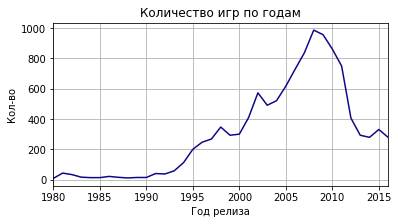

In [86]:

plt

(
    games_per_year
        .plot(figsize=(6, 3), colormap='plasma', grid=True, legend=False, title='Количество игр по годам')
        .set(xlabel='Год релиза', ylabel='Кол-во')
)

plt.show()

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
    
Наглядная визуализация получилась, здорово, что не забывавешь подписывать оси на графиках и сам график

На мой взгляд данные за весь период нам будут не очень инетерсны, так как основной рост в кол-ве выпускаемых игр пришелся на время запуска Sony Playstation + когда компьютеры стали более популярны в частных целях и они стали более доступные в домашних условиях использования. Мне кажется можно ограничиться последним десятилетием 


### 2) Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [87]:
#  Функция глобальные продажи по платформам
def total_sales_per_platform_for(df):
    return (
        df
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values('total_sales', ascending=False)
    )

In [88]:
# Столбчатая диаграмма глобальных продаж
def bar_plot(df):
    (
        df
            .plot(kind='bar', y='total_sales', figsize=(10, 5), grid=True, legend=False)
            .set(xlabel='Платформа', ylabel='Глобальные продажи')
    )
    plt.show()

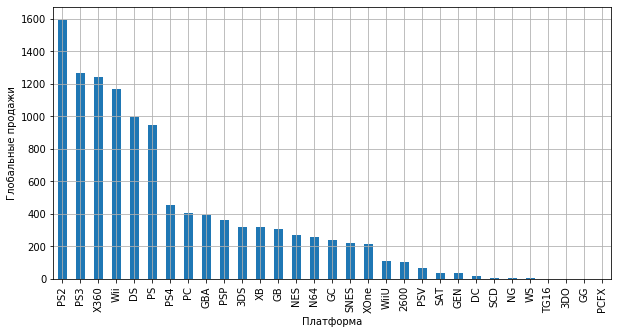

In [89]:
bar_plot(total_sales_per_platform_for(games))

Выберем платформы с наибольшими глобальными продажами, например, первые 5 из списка выше и построим распределение по годам.



In [90]:
top5 = total_sales_per_platform_for(games).head(5)


In [91]:
top5

,total_sales
platform,
PS2,1595.06
PS3,1269.94
X360,1242.18
Wii,1169.72
DS,995.01


In [92]:
def yearly_total_sales_by_platform(name, df):
    
    #Глобальные продажи по платформе по годам
    
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

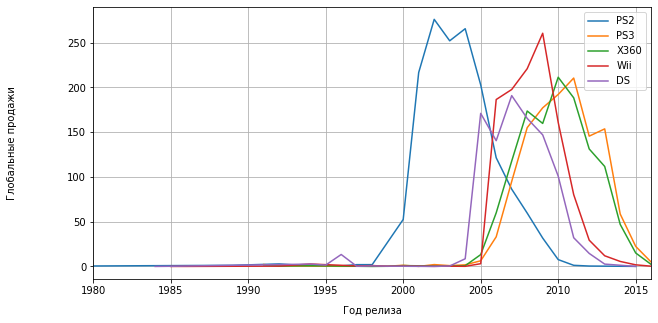

In [93]:
# Линейный график глобальных продаж по платформе по годам
for platform in list(top5.index):
    yearly_total_sales_by_platform(platform, games)['total_sales'].plot(figsize=(10, 5), grid=True, label=platform)
    plt.xlabel("Год релиза", labelpad=10)
    plt.ylabel("Глобальные продажи", labelpad=50)
    plt.legend()

~ 10 лет срок жизни платформы. Таким образом, мы еще раз убедились, что данные за все периоды нам не понадобятся – достаточно определить актуальный период в 10 лет и смотреть на игры на современных платформах.

In [94]:

actual_years = (games['year_of_release'] > 2006) & (games['year_of_release'] <= 2016)
actual_games = games.loc[actual_years]

In [95]:
actual_years

0        False
1        False
2         True
3         True
4        False
         ...  
16710     True
16711    False
16712     True
16713    False
16714     True
Name: year_of_release, Length: 16713, dtype: bool

### 3) Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [96]:
total_sales = total_sales_per_platform_for(actual_games)


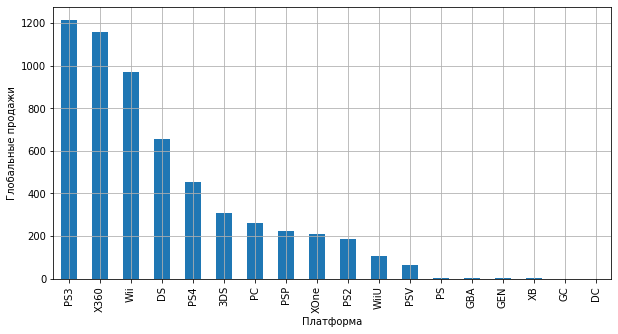

In [97]:
bar_plot(total_sales)


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 2011.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


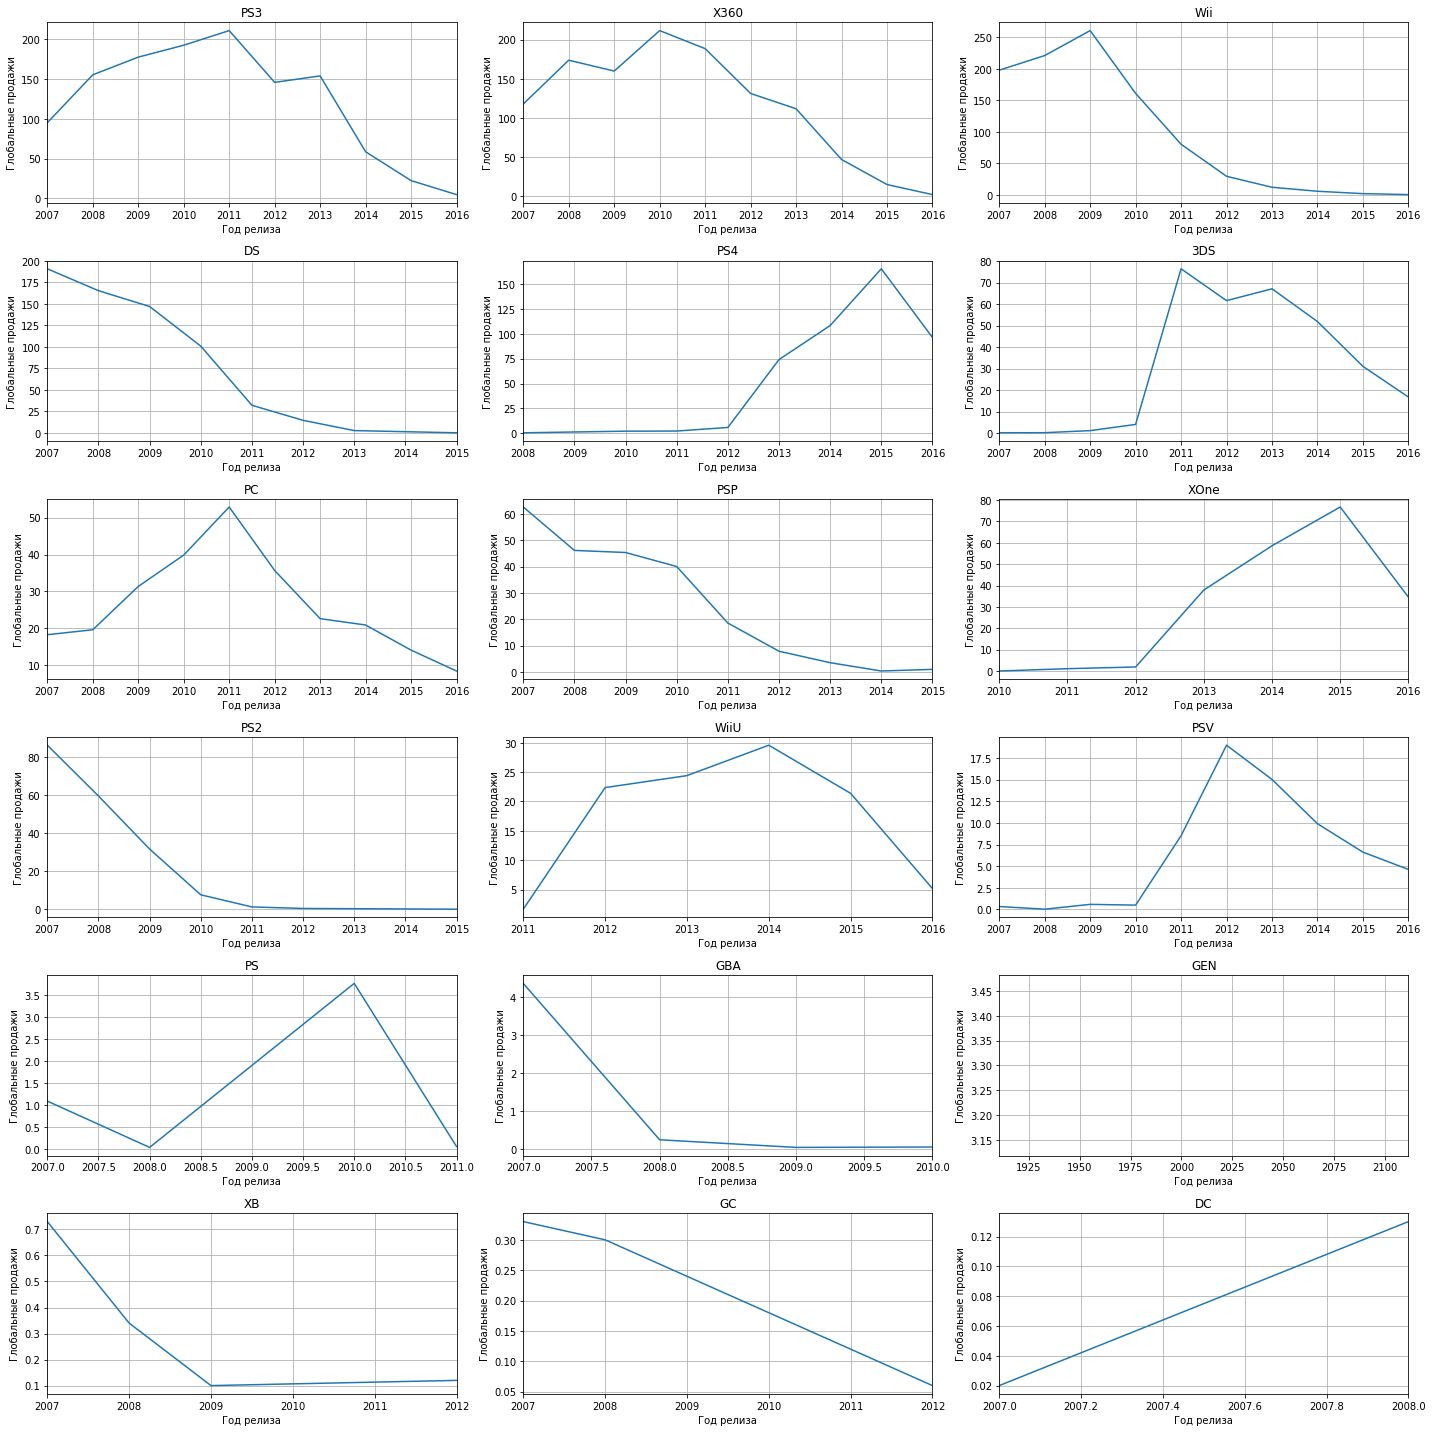

In [98]:
# список платформ за актуальный период
platforms = list(total_sales.index)

# график из 6 строк
rows = 6
cols = (len(platforms) // rows)
fig, ax = plt.subplots(rows, cols)

# построение графиков продаж по каждой платформе
num = 0
for row in range(rows):
    for col in range(cols):
        platform = platforms[num]
        (
            yearly_total_sales_by_platform(platform, actual_games)['total_sales']
                .plot(ax=ax[row, col], figsize=(20, 20), grid=True, title=platform)
                .set(xlabel='Год релиза', ylabel='Глобальные продажи')
        )
        num += 1

plt.tight_layout()
plt.show()


По графикам видим, что несмотря на лидирующие продажи за актуальный период, эра большинства платформ подходит к концу и продажи значительно падают. Из перспективных – консоли нового поколения:

- PS4: ~100 млн.
- XOne: ~40 млн.
Из портативных только 3DS от Nintendo пока еще держится в топе по продажам за 2016 год (около 20 млн).

Объем продаж компьютерных игр с каждым годом все меньше.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
    
С выводами согласен

### 4) Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах?

Среднее значение глобальных продаж игр для PS4: 56.82250000000003
Среднее значение глобальных продаж игр для XOne: 30.114285714285717


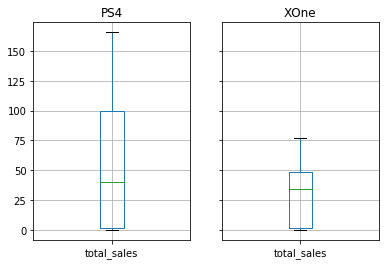

In [99]:
promising_platforms = ['PS4', 'XOne']

fig, axs = plt.subplots(1, 2, sharey=True)

# построение графиков продаж по каждой платформе
for num, platform in enumerate(promising_platforms):
    df = yearly_total_sales_by_platform(platform, actual_games)
    print(f"Среднее значение глобальных продаж игр для {platform}: {df['total_sales'].mean()}")
    df.boxplot('total_sales', ax=axs[num])
    axs[num].set_title(platform)

#plt.tick_params(labelcolor='none', bottom='off')
plt.subplots_adjust(left=0.1)
plt.show()

Сумма глобальных продаж игр для PS4 примерно в 2 раза больше чем у Xbox One

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
    
Тут тоже всё верно

### 5) Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [100]:
ps4 = actual_games.query("platform == 'PS4'")
xone = actual_games.query("platform == 'XOne'")

In [101]:
features = ['user_score', 'critic_score', 'total_sales']
ps4[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.558747,-0.038210
critic_score,0.558747,1.000000,0.390762
total_sales,-0.038210,0.390762,1.000000


In [102]:
xone[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.061181
critic_score,0.472462,1.000000,0.417843
total_sales,-0.061181,0.417843,1.000000


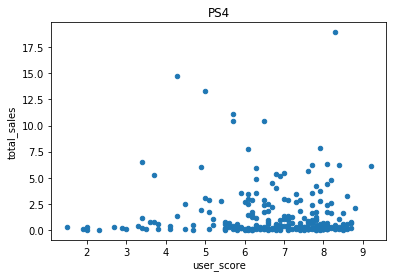

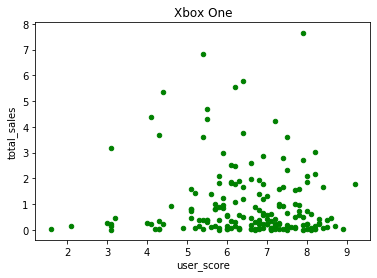

In [103]:

ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='user_score', y='total_sales', kind='scatter', title='Xbox One', color='green')
plt.show()

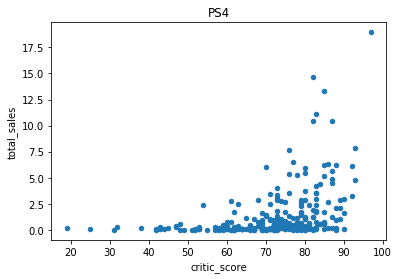

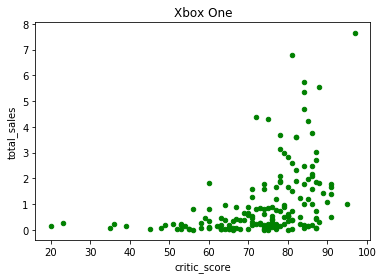

In [104]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='critic_score', y='total_sales', kind='scatter', title='Xbox One', color='green')
plt.show()

Выводы:

- Взаимосвязи между отзывами пользователей и продажами нет;
- Взаимосвязь между отзывами критиков и продажами существует, однако не слишком большая;
- Взаимосязь между отзывами критиков и отзывами пользователей существует, чуть большая чем между отзывами критиков и продажами.
- Корреляция не говорит о причинно-следственной связи. И хотя по диаграммам рассеяния видим, что чем выше оценки критиков, тем выше продажи игр на обоих платформах, мы не можем утверждать, что высокие оценки критиками приводят к высоким продажам игр, а при покупке игры пользователи больше доверяют критикам, а не заядлым игроманам

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

очень детально подходишь к работе, верные выводы, здорово!)

### 6) Посмотрите на общее распределение игр по жанрам.

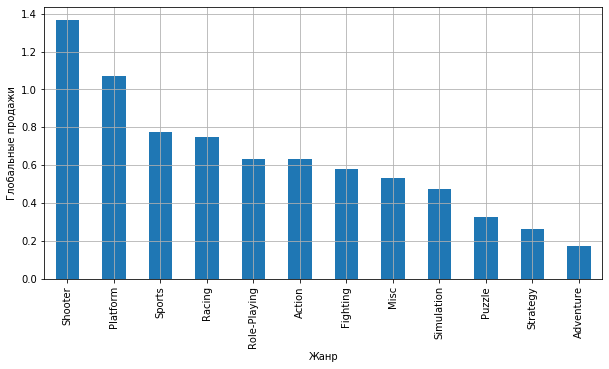

In [105]:
(actual_games
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), grid=True, legend=False)
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

 Самыми популярными жанрами
 являются шутеры, платформеры, а также спортивные игры. Хуже всего продаются стратегии и квесты.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>
    
Платформы проанализированны и всё выполнено правильно, радует, что пишешь выводы! теперь можно посмотреть и на портреты пользователей по регионам

## 4. Портрет пользователя каждого региона



#### North America



In [106]:
plt.style.use('seaborn')


In [107]:
region = 'na_sales'


In [108]:
def top5_in_region(column):
    return (
        actual_games
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(5)
    )

In [109]:
def sales_pie_by_region(df):
    (
        df
            .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(10, 5), legend=False)
            .set(ylabel='Продажи')
    )
    plt.show()

##### Самые популярные платформы (топ-5)


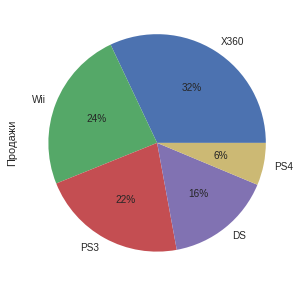

In [110]:
sales_pie_by_region(top5_in_region('platform'))


В Северной Америке Самая популярная платформа XBox, это объясняется тем что произвоит её Microsoft

##### Самые популярные жанры (топ-5)


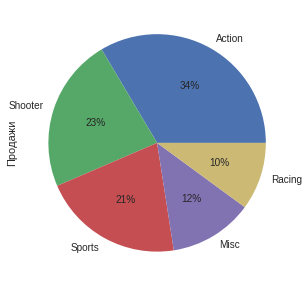

In [117]:
sales_pie_by_region(top5_in_region('genre'))


 Экшены и шутеры – самые популярные жанры.

##### Влияет ли рейтинг ESRB на продажи



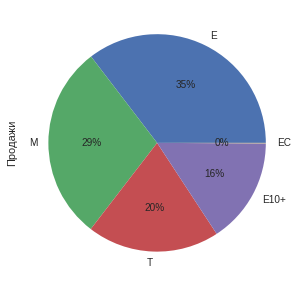

In [112]:
sales_pie_by_region(top5_in_region('rating'))


Большая часть продаж приходится на игры для детей 6+ (E) и лишь 29% приходится на взрослую аудиторию (М)

#### Europe

In [113]:
region = 'eu_sales'


##### Самые популярные платформы (топ-5)


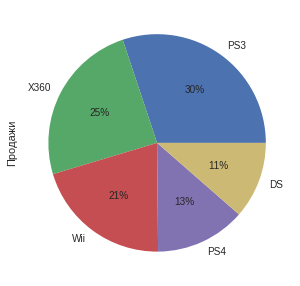

In [116]:
sales_pie_by_region(top5_in_region('platform'))

Самая популярная платформа Playstation, Xbox на втором месте

##### Самые популярные жанры (топ-5)


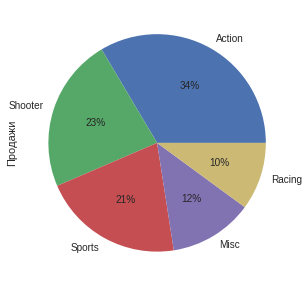

In [118]:
sales_pie_by_region(top5_in_region('genre'))


 Экшены и шутеры – самые популярные жанры.

##### Влияет ли рейтинг ESRB на продажи


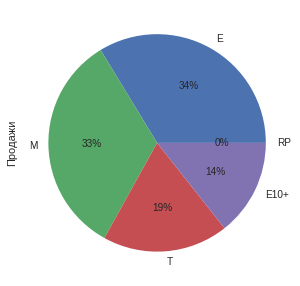

In [119]:
sales_pie_by_region(top5_in_region('rating'))


В целом картина очень похожа на Северную америку, только игры для взрослых блиде поднятунись в играм из категории 6+

#### Japan

In [120]:
region = 'jp_sales'


##### Самые популярные платформы (топ-5)


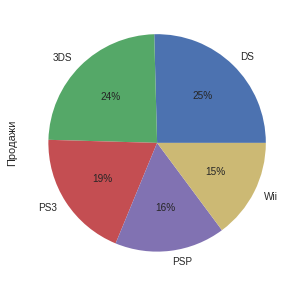

In [121]:
sales_pie_by_region(top5_in_region('platform'))

В Японии картина продаж кардинально меняется. Японцы много играют на портативных консолях типа Nintento (3)DS, PSP и пр. Здесь мы практически не видим присутствия Xbox в пятерке лидеров.



##### Самые популярные жанры (топ-5)


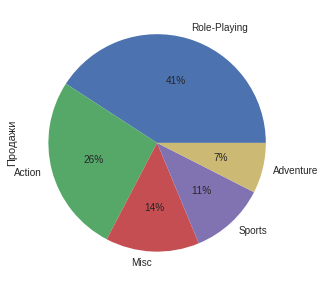

In [122]:
sales_pie_by_region(top5_in_region('genre'))


Ролевые игры  – самые популярные. К слову, экшены отстают по продажам примерно в полтора раза.



#### Влияет ли рейтинг ESRB на продажи


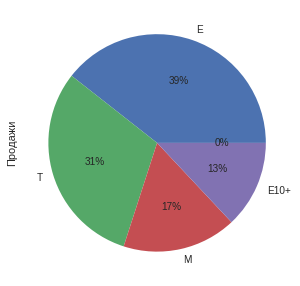

In [123]:
sales_pie_by_region(top5_in_region('rating'))


В Японии хуже всего продаются игры для взрослой аудитории – всего 17% продаж.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Портреты пользователей построены, все выводы правильные, продолжай в том же духе!

## 5. Проверка гипотез


Для каждой из приведенных ниже гипотез проверим две (двусторонние) гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Чтобы понять, различаются ли пользовательские рейтинги и значима ли разница между средними значениями, проведем статистические тесты.

#### Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
Мы рассматриваем две генеральные сопокупности – игры на разных платформах.

- Нулевая гипотеза H₀:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Исходя из H₀ формулируем альтернативную гипотезу H₁:

Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 3%. 

In [124]:
alpha = .03


In [129]:
pc = actual_games.query("platform == 'PC'")

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False,  # Welch’s t-test, который не предполагает равенство дисперсий
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.029951657643345574
Отвергаем нулевую гипотезу


In [130]:
pc['user_score'].mean()


6.770790378006873

In [131]:
xone['user_score'].mean()


6.508839779005524

p-value получили равным ~3%. Если бы рейтинги пользователей НЕ отличались (наша нулевая гипотеза), то те различия, что мы фактически видим, могли бы получиться случайно лишь в 3% случаев. Это весьма маленькая вероятность. Таким образом, различия довольно высокие для предположения равенства рейтингов. Но так как мы задали жесткий уровень значимости (0.025), то говорим, что тем не менее не будем отклонять гипотезу, но со стандартным уровнем в 0.05 мы бы ее уже отвергли.

Гипотеза Средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась.

#### Средние пользовательские рейтинги жанров Action и Sports разные
Мы рассматриваем две генеральные сопокупности – игры разных жанров.

- Нулевая гипотеза H₀:

Средние пользовательские рейтинги жанров Action и Sports одинаковые.

- Исходя из H₀ формулируем альтернативную гипотезу H₁:

Средние пользовательские рейтинги жанров Action и Sports различаются.

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [132]:
alpha = .05


In [133]:
action = actual_games.query("genre == 'Action'")
sports = actual_games.query("genre == 'Sports'")

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.648261415089771e-12
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги различаются, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится.

Гипотеза Средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Радует, что для проверки гипотез используешь правильные методы, выводы по результатам проверки тоже правильные, молодец

## 6. Общий вывод



Тезисы:

- Платформы появляются и умирают в течение 10 лет.
- Наиболее популярные на данный момент платформы – это Sony PlayStation 4 и Xbox One. Они появились пару лет назад и имеют потенциал роста.
- В США и Европе лучше всего продаются шутеры и экшены.
- Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры.
- Больше всего продаж приходятся на игры, разрешенные для детей.

Обе сформулированные гипотезы подтвердились:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Вывод можно было бы написать и подробнее можно, а так же можно давать советы по использованию данного анализа в будущем

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Ты проделал колоссальную работу и я очень рад за тебя! Удачи на следующем этапе!